In [1]:
import os
import string
import glob
import unicodedata
import math
import torch
import torch.nn as nn
import random
import time
import matplotlib.pyplot as plt
from io import open


In [2]:
# Get all common characters including letters and common punctuation
all_letters = string.ascii_letters + " .,;'"

# Get the number of common characters
n_letters = len(all_letters)

print("n_letter:", n_letters)

n_letter: 57


In [3]:
# We'll ignore the encoding issue for now
# We think that this function serves to remove accent marks in some languages
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [4]:
s= "àáâãäåæçèéêëìíîïðñòóõôöøùúûüýþšÿœ"
a = unicodeToAscii(s)
print(a)

aaaaaaceeeeiiiinooooouuuuysy


In [5]:
data_path = "./data/data/names/"

def readLines(filename):
    """Read each line from the file and load it into memory to form a list"""
    # Open the specified file and read all the contents, use strip() to remove whitespace on both sides, then slice with '\n
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    # Ascii conversion for each name in the list of lines to normalize it. Finally, a list of names is returned
    return [unicodeToAscii(line) for line in lines]

In [6]:
# filename is a specific file in the dataset, we choose Chinese.txt here
filename = data_path + "Chinese.txt"
lines = readLines(filename)
print(lines)

['Ang', 'AuYong', 'Bai', 'Ban', 'Bao', 'Bei', 'Bian', 'Bui', 'Cai', 'Cao', 'Cen', 'Chai', 'Chaim', 'Chan', 'Chang', 'Chao', 'Che', 'Chen', 'Cheng', 'Cheung', 'Chew', 'Chieu', 'Chin', 'Chong', 'Chou', 'Chu', 'Cui', 'Dai', 'Deng', 'Ding', 'Dong', 'Dou', 'Duan', 'Eng', 'Fan', 'Fei', 'Feng', 'Foong', 'Fung', 'Gan', 'Gauk', 'Geng', 'Gim', 'Gok', 'Gong', 'Guan', 'Guang', 'Guo', 'Gwock', 'Han', 'Hang', 'Hao', 'Hew', 'Hiu', 'Hong', 'Hor', 'Hsiao', 'Hua', 'Huan', 'Huang', 'Hui', 'Huie', 'Huo', 'Jia', 'Jiang', 'Jin', 'Jing', 'Joe', 'Kang', 'Kau', 'Khoo', 'Khu', 'Kong', 'Koo', 'Kwan', 'Kwei', 'Kwong', 'Lai', 'Lam', 'Lang', 'Lau', 'Law', 'Lew', 'Lian', 'Liao', 'Lim', 'Lin', 'Ling', 'Liu', 'Loh', 'Long', 'Loong', 'Luo', 'Mah', 'Mai', 'Mak', 'Mao', 'Mar', 'Mei', 'Meng', 'Miao', 'Min', 'Ming', 'Moy', 'Mui', 'Nie', 'Niu', 'OuYang', 'OwYang', 'Pan', 'Pang', 'Pei', 'Peng', 'Ping', 'Qian', 'Qin', 'Qiu', 'Quan', 'Que', 'Ran', 'Rao', 'Rong', 'Ruan', 'Sam', 'Seah', 'See ', 'Seow', 'Seto', 'Sha', 'Shan', 'Sh

In [7]:
# Build category_lines like this: {"English":["Lily", "Susan", "Kobe"], "Chinese":["Zhang San", "Xiao Ming"]}
category_lines = {}

# all_categories ： ["English",...,"Chinese"]
all_categories = []

# Read txt file under specified path, use glob, regular expressions can be used in path
for filename in glob.glob(data_path + '*.txt'):
    # Get the file name of each file, which is the corresponding name category
    category = os.path.splitext(os.path.basename(filename))[0]
    # Load them one by one into the all_categories list
    all_categories.append(category)
    # Then read the contents of each file to form a list of names
    lines = readLines(filename)
    # Write the list of names to the category_lines dictionary according to the corresponding category
    category_lines[category] = lines


# View category totals
n_categories = len(all_categories)
print("n_categories:", n_categories)

# Check out some of them at random
print(category_lines['Italian'][:5])

n_categories: 18
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [8]:
n_categories: 18
['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']

In [9]:
#  Convert a string (word granularity) into a tensor representation, get tensor ...
def lineToTensor(line):
    """Converts a person's name into the corresponding onehot tensor representation, the argument line is the input person's name."""
    # First initialize a 0 tensor, its shape (len(line), 1, n_letters) 
    # Each letter in the name is represented by a 1 x n_letters tensor.
    tensor = torch.zeros(len(line), 1, n_letters)
    # Iterate through each character index and character in this person's name
    for li, letter in enumerate(line):
        # Use the string method find to find the index of each character in all_letters
        # It is also the index position of 1 in the onehot tensor we generate
        tensor[li][0][all_letters.find(letter)] = 1
    
    return tensor

In [10]:
line = "Qiu"
line_tensor = lineToTensor(line)
print("line_tensot:", line_tensor)

line_tensot: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])


In [11]:
# Use nn.RNN to build the completed traditional RNN use class

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        """The initialization function has 4 parameters, which represent the last dimension of RNN input, the last dimension of RNN hidden layer, and the number of RNN layers respectively."""
        super(RNN, self).__init__()       
        # Pass hidden_size and num_layers into it
        self.hidden_size = hidden_size
        self.num_layers = num_layers  

        # RNN, with three parameters input_size, hidden_size, num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers)
        # Instantiate nn.Linear, the linear layer used to transform the output dimension of nn.RNN into the specified output dimension
        self.linear = nn.Linear(hidden_size, output_size)
        # Instantiate the predefined Softmax layer in nn, used to obtain the category results from the output layer
        self.softmax = nn.LogSoftmax(dim=-1)


    def forward(self, input, hidden):
        """Completing the main logic in a traditional RNN, the input parameter input represents the input tensor, which has the shape of 1 x n_letters
           hidden represents the hidden tensor of the RNN, which has the shape self.num_layers x 1 x self.hidden_size"""
        # Because the predefined nn.RNN requires that the input dimension must be a three-dimensional tensor, so here we use unsqueeze(0) to extend a dimension
        input = input.unsqueeze(0)
        # input and hidden into the instantiated object of traditional RNN if num_layers=1, rr constant equals hn
        rr, hn = self.rnn(input, hidden)
        # Return the results obtained from the RNN by linear transformation and softmax, and also return hn as input to the subsequent RNN
        return self.softmax(self.linear(rr)), hn


    def initHidden(self):
        """Initialize the hidden tensor"""
        # Initialize a (self.num_layers, 1, self.hidden_size) shaped 0 tensor     
        return torch.zeros(self.num_layers, 1, self.hidden_size)  

In [12]:
x = torch.tensor([1, 2, 3, 4])
torch.unsqueeze(x, 0)
torch.tensor([[ 1,  2,  3,  4]])
torch.unsqueeze(x, 1)
torch.tensor([[ 1],
        [ 2],
        [ 3],
        [ 4]])

tensor([[1],
        [2],
        [3],
        [4]])

In [13]:
# Use nn.LSTM to build the completed LSTM usage class

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        """The parameters of the initialization function are the same as those of the traditional RNN."""
        super(LSTM, self).__init__()
        # Pass hidden_size and num_layers into it
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Instantiate the predefined nn.LSTM
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        # Instantiate nn.Linear, the linear layer used to transform the output dimension of nn.RNN into the specified output dimension
        self.linear = nn.Linear(hidden_size, output_size)
        # Instantiate the predefined Softmax layer in nn, used to obtain the category results from the output layer
        self.softmax = nn.LogSoftmax(dim=-1)


    def forward(self, input, hidden, c):
        """An extra parameter c in the main logic function, which is the cell state tensor in the LSTM"""
        # Use unsqueeze(0) to extend a dimension
        input = input.unsqueeze(0)
         # Pass input, hidden and initialized c into lstm
        rr, (hn, c) = self.lstm(input, (hidden, c))
        # Finally return the processed rr, hn, c
        return self.softmax(self.linear(rr)), hn, c

    def initHiddenAndC(self):  
        """The initialization function not only initializes hidden but also initializes the cell state c, which has the same shape."""
        c = hidden = torch.zeros(self.num_layers, 1, self.hidden_size)
        return hidden, c

In [14]:
# Use nn.GRU to build a traditional RNN using classes
# GRU has the same external form as the traditional RNN, both pass only the hidden layer tensor, so only the names of the predefined layers need to be changed

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRU, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # GRU, with three parameters input_size, hidden_size, num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers)
        self.linear = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=-1)

    def forward(self, input, hidden):
        input = input.unsqueeze(0)
        rr, hn = self.gru(input, hidden)
        return self.softmax(self.linear(rr)), hn

    def initHidden(self):
        return torch.zeros(self.num_layers, 1, self.hidden_size)

In [15]:
# Because of the onehot encoding, the dimension of the last dimension of the input tensor is n_letters
input_size = n_letters

# Define the size of the last dimension of the hidden layer
n_hidden = 128

# Output size is the total number of language categories n_categories
output_size = n_categories
# num_layer uses the default value, num_layers = 1

In [16]:
# If we take a letter B as the first input to the RNN, it is converted to a tensor by lineToTensor
# Because our lineToTensor output is a three-dimensional tensor, and the RNN class requires a two-dimensional tensor
# So we need to use squeeze(0) to reduce the dimensionality by one
input = lineToTensor('B').squeeze(0)

# Initialize a 3D hidden layer 0 tensor, which is also the initial cell state tensor
hidden = c = torch.zeros(1, 1, n_hidden)

In [17]:
rnn = RNN(n_letters, n_hidden, n_categories)
lstm = LSTM(n_letters, n_hidden, n_categories)
gru = GRU(n_letters, n_hidden, n_categories)

rnn_output, next_hidden = rnn(input, hidden)
print("rnn:", rnn_output)
lstm_output, next_hidden, c = lstm(input, hidden, c)
print("lstm:", lstm_output)
gru_output, next_hidden = gru(input, hidden)
print("gru:", gru_output)

rnn: tensor([[[-2.8479, -3.0319, -2.8716, -2.8824, -2.9023, -2.9043, -2.8385,
          -2.8385, -2.8303, -2.7940, -2.9442, -2.9497, -2.8714, -2.9510,
          -2.9176, -2.8447, -2.9065, -2.9276]]], grad_fn=<LogSoftmaxBackward0>)
lstm: tensor([[[-2.8255, -2.9213, -2.8857, -2.9610, -2.9331, -2.9600, -2.8651,
          -2.9269, -2.9058, -2.8480, -2.8371, -2.8466, -2.8532, -2.8579,
          -2.8497, -2.9565, -2.9017, -2.9088]]], grad_fn=<LogSoftmaxBackward0>)
gru: tensor([[[-2.9032, -2.8672, -2.9305, -2.9576, -2.9292, -2.9390, -2.9182,
          -2.8892, -2.8072, -2.8154, -2.9166, -2.8609, -2.8514, -2.8841,
          -2.8897, -2.9367, -2.8543, -2.8915]]], grad_fn=<LogSoftmaxBackward0>)


In [18]:
def categoryFromOutput(output):
    """Get the specified category from the output result, the parameter is the output tensor output"""
    # Returns the largest value and index object from the output tensor, we mainly need this index here
    top_n, top_i = output.topk(1)
    # top_i object to retrieve the value of the index
    category_i = top_i[0].item()
    # Get the language category according to the index value, return the language category and index value
    return all_categories[category_i], category_i

In [19]:
x = torch.arange(1., 6.)
x

tensor([1., 2., 3., 4., 5.])

In [20]:
torch.topk(x, 3)

torch.return_types.topk(
values=tensor([5., 4., 3.]),
indices=tensor([4, 3, 2]))

In [21]:
# Use the output of gru from the previous step as input to the function
output = gru_output
# tensor([[[-2.8042, -2.8894, -2.8355, -2.8951, -2.8682, -2.9502, -2.9056,
#          -2.8963, -2.8671, -2.9109, -2.9425, -2.8390, -2.9229, -2.8081,
#          -2.8800, -2.9561, -2.9205, -2.9546]]], grad_fn=<LogSoftmaxBackward>)

In [22]:
category, category_i = categoryFromOutput(output)
print("category:", category) 
print("category_i:", category_i)

category: Irish
category_i: 8


In [23]:
def randomTrainingExample():
    """This function is used to generate training data randomly."""
    # First select a random category from all_categories using random's choice method
    category = random.choice(all_categories)
    # And then take the list of names corresponding to the category category through the category_lines dictionary
    # and then take a random name from the list
    line = random.choice(category_lines[category])
    # Then wrap the index of this category in the list of all categories into a tensor, and get the category tensor category_tensor
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    # Finally, the randomly selected name is transformed into a onehot tensor representation by the function lineToTensor
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

In [24]:
# We took ten randomly to view the results
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line, '/ category_tensor =', category_tensor)

category = German / line = Bohler / category_tensor = tensor([6])
category = Dutch / line = Tunison / category_tensor = tensor([3])
category = Arabic / line = Botros / category_tensor = tensor([0])
category = Russian / line = Jigultsov / category_tensor = tensor([14])
category = Chinese / line = Liao / category_tensor = tensor([1])
category = Vietnamese / line = Thuy / category_tensor = tensor([17])
category = Dutch / line = Rompaye / category_tensor = tensor([3])
category = Greek / line = Chrysanthopoulos / category_tensor = tensor([7])
category = Spanish / line = San nicolas / category_tensor = tensor([16])
category = Irish / line = Flann / category_tensor = tensor([8])


In [25]:
# NLLLoss, because the last layer of the RNN is nn.LogSoftmax, and the internal computational logic of the two can match exactly.  
criterion = nn.NLLLoss()

# Set the learning rate to 0.005
learning_rate = 0.005 

def trainRNN(category_tensor, line_tensor):
    """Defines the training function, its two parameters are the tensor representation of category_tensor category, which corresponds to the label of the training data,
       line_tensor name tensor representation, which corresponds to the training data."""
    # In the function, the hidden tensor is first initialized by instantiating the object rnn
    hidden = rnn.initHidden()

    # Then normalize the gradient in the model structure to zero
    rnn.zero_grad()

    # The following training process starts, each character of the training data line_tensor is passed into rnn one by one, and the final result is obtained
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    # Because our rnn object is instantiated by nn.RNN, the final output shape is a 3D tensor, in order to satisfy the category_tensor
    # To compare and calculate the loss, we need to reduce the first dimension, here we use the squeeze() method
    loss = criterion(output.squeeze(0), category_tensor)

    # losses are back propagated
    loss.backward()
    # Update all parameters in the model
    for p in rnn.parameters():
        # Update the parameters by adding the tensor representation of the parameters and the gradient of the parameters multiplied by the learning rate
        p.data.add_(-learning_rate, p.grad.data)
    # Return the result and the value of the loss
    return output, loss.item()

In [26]:
a = torch.randn(4)
a

tensor([-0.0695, -0.0270,  1.1463, -0.4515])

In [27]:
b = torch.randn(4, 1)
b

tensor([[ 0.2351],
        [-0.9780],
        [-0.5588],
        [-0.5163]])

In [28]:
torch.add(a, b, alpha=10)

tensor([[  2.2817,   2.3242,   3.4975,   1.8998],
        [ -9.8498,  -9.8073,  -8.6339, -10.2317],
        [ -5.6576,  -5.6151,  -4.4418,  -6.0395],
        [ -5.2325,  -5.1900,  -4.0167,  -5.6145]])

In [29]:
# More cell states compared to conventional RNNc

def trainLSTM(category_tensor, line_tensor):
    hidden, c = lstm.initHiddenAndC()
    lstm.zero_grad()
    for i in range(line_tensor.size()[0]):
        # Returns output, hidden and cell state c
        output, hidden, c = lstm(line_tensor[i], hidden, c)
    loss = criterion(output.squeeze(0), category_tensor)
    loss.backward()

    for p in lstm.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()

In [30]:
# Exactly the same as traditional RNN, but with the name changed to GRU

def trainGRU(category_tensor, line_tensor):
    hidden = gru.initHidden()
    gru.zero_grad()
    for i in range(line_tensor.size()[0]):
        output, hidden= gru(line_tensor[i], hidden)
    loss = criterion(output.squeeze(0), category_tensor)
    loss.backward()

    for p in gru.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    return output, loss.item()

In [31]:
def timeSince(since):
    "Get the training elapsed time for each print, since is the training start time"
    # Get the current time
    now = time.time()
    # Get the time difference, which is the training elapsed time
    s = now - since
    # Convert seconds to minutes, and round up
    m = math.floor(s / 60)
    # Calculate the number of seconds left to make up the 1 minute
    s -= m * 60
    # Returns the elapsed time for the specified format
    return '%dm %ds' % (m, s)

In [32]:
# Assume that the model training starts 10min before
since = time.time() - 10*60

In [33]:
period = timeSince(since)
print(period)

10m 0s


In [34]:
# Set the number of training iterations
n_iters = 1000
# Set the print interval for the results
print_every = 100
# Set the mapping interval on the plotted loss curve
plot_every = 10

def train(train_type_fn):
    """The log printing function for the training process, with the parameter train_type_fn representing which model training function is selected, e.g. trainRNN"""
    # Loss saving list for each mapping interval
    all_losses = []
    # Get training start time stamp
    start = time.time()
    # Set initial interval loss to 0
    current_loss = 0
    # Training iterations starting from 1, total n_iters 
    for iter in range(1, n_iters + 1):
        # Get a random set of training data and the corresponding class by randomTrainingExample function
        category, line, category_tensor, line_tensor = randomTrainingExample()
        # Pass the training data and the tensor representation of the corresponding category into the train function
        output, loss = train_type_fn(category_tensor, line_tensor)      
        # Calculate the total loss in the mapping interval
        current_loss += loss   
        # If the number of iterations can divide the print interval
        if iter % print_every == 0:
            # Take the output on this iteration step and get the corresponding category and category index through categoryFromOutput function
            guess, guess_i = categoryFromOutput(output)
            # Then compare it with the real category category, if it is the same then put a check mark, otherwise put a cross mark.
            correct = '✓' if guess == category else '✗ (%s)' % category
            # Print the iteration step, the percentage of iteration steps, the current training time, the loss, the name of the predicted step, and whether it is correct                        
            print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

        # If the number of iterations is divisible by the mapping interval
        if iter % plot_every == 0:
            # will save the average loss in the interval to the all_losses list
            all_losses.append(current_loss / plot_every)
            # Interval loss reset to 0
            current_loss = 0
    # Returns the corresponding total loss list and training time
    return all_losses, int(time.time() - start)

<ipython-input-25-86428cb10ab8>:29: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\python_arg_parser.cpp:1055.)
  p.data.add_(-learning_rate, p.grad.data)


100 10% (0m 0s) 2.9666 Truong / Irish ✗ (Vietnamese)
200 20% (0m 1s) 2.7796 Crespo / German ✗ (Portuguese)
300 30% (0m 2s) 2.8704 Than / German ✗ (Vietnamese)
400 40% (0m 2s) 2.8022 Taflambas / German ✗ (Greek)
500 50% (0m 3s) 2.9455 Lihosherstov / German ✗ (Russian)
600 60% (0m 3s) 2.8511 Nazari / Scottish ✗ (Arabic)
700 70% (0m 4s) 2.9911 Tsvelikhovsky / Arabic ✗ (Russian)
800 80% (0m 4s) 2.8316 Jong / Irish ✗ (Korean)
900 90% (0m 5s) 2.9342 Durante / Italian ✗ (Spanish)
1000 100% (0m 6s) 2.7419 Najjar / Italian ✗ (Arabic)
100 10% (0m 0s) 2.8535 Costa / Arabic ✗ (Portuguese)
200 20% (0m 1s) 2.8704 Alshtut / German ✗ (Russian)
300 30% (0m 2s) 2.8513 Tugarinov / German ✗ (Russian)
400 40% (0m 3s) 2.9310 Orton / German ✗ (English)
500 50% (0m 4s) 2.8908 Maessen / German ✗ (Dutch)
600 60% (0m 5s) 2.8563 Altamura / German ✗ (Italian)
700 70% (0m 6s) 2.9193 Wizner / German ✗ (Czech)
800 80% (0m 7s) 2.8620 Janda / German ✗ (Polish)
900 90% (0m 8s) 2.8509 Kajiyama / German ✗ (Japanese)
1000 

<BarContainer object of 3 artists>

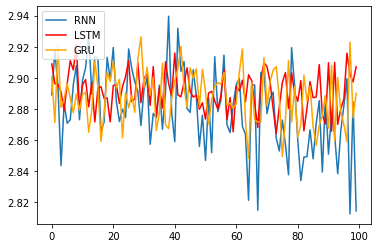

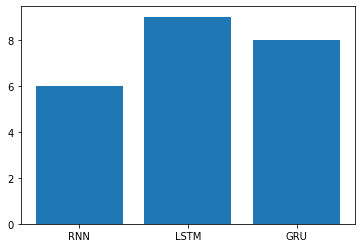

In [35]:
# Call the train function to train the RNN, LSTM, and GRU models respectively
# and return the full loss of each, and the training time for mapping
all_losses1, period1 = train(trainRNN)
all_losses2, period2 = train(trainLSTM)
all_losses3, period3 = train(trainGRU)

# Plot loss contrast curve, training time comparison bar graph
# Create canvas 0
plt.figure(0)
# Plotting loss comparison curves
plt.plot(all_losses1, label="RNN")
plt.plot(all_losses2, color="red", label="LSTM")
plt.plot(all_losses3, color="orange", label="GRU") 
plt.legend(loc='upper left') 

# Create canvas 1
plt.figure(1)
x_data=["RNN", "LSTM", "GRU"] 
y_data = [period1, period2, period3]
# Plotting training time comparison histogram
plt.bar(range(len(x_data)), y_data, tick_label=x_data)

In [36]:
def evaluateRNN(line_tensor):
    """evaluation function, same logic as the training function, with line_tensor as the tensor representation of the name"""
    # Initialize the hidden tensor
    hidden = rnn.initHidden()
    # Pass each character of the evaluation data line_tensor into rnn one by one
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    # Get the output
    return output.squeeze(0)

In [37]:
def evaluateLSTM(line_tensor):
    # Initialize the hidden layer tensor and cell state tensor
    hidden, c = lstm.initHiddenAndC()
    # Pass each character of the evaluation data line_tensor into lstm one by one
    for i in range(line_tensor.size()[0]):
        output, hidden, c = lstm(line_tensor[i], hidden, c)
    return output.squeeze(0)

In [38]:
def evaluateGRU(line_tensor):
    hidden = gru.initHidden()
    # Pass each character of the evaluation data line_tensor into gru one by one
    for i in range(line_tensor.size()[0]):
        output, hidden = gru(line_tensor[i], hidden)
    return output.squeeze(0)

In [39]:
line = "Zhi"
line_tensor = lineToTensor(line)

In [40]:
rnn_output = evaluateRNN(line_tensor)
lstm_output = evaluateLSTM(line_tensor)
gru_output = evaluateGRU(line_tensor)
print("rnn_output:", rnn_output)
print("gru_output:", lstm_output)
print("gru_output:", gru_output)

rnn_output: tensor([[-2.8207, -2.9827, -2.8962, -2.8957, -3.1012, -2.9269, -2.9010, -2.9643,
         -2.7535, -2.6907, -2.7238, -2.8864, -2.9224, -3.0240, -2.9186, -2.8265,
         -2.9495, -2.9334]], grad_fn=<SqueezeBackward1>)
gru_output: tensor([[-2.8582, -2.9065, -2.9355, -2.9319, -2.9120, -2.9503, -2.8079, -2.9250,
         -2.8823, -2.8345, -2.8483, -2.8805, -2.8601, -2.8910, -2.8253, -2.9615,
         -2.8886, -2.9453]], grad_fn=<SqueezeBackward1>)
gru_output: tensor([[-2.9248, -2.8188, -2.9786, -2.9056, -2.9004, -2.9521, -2.9383, -2.8501,
         -2.7652, -2.8204, -2.9355, -2.7933, -2.8232, -2.8768, -2.9232, -2.9839,
         -2.9029, -2.9716]], grad_fn=<SqueezeBackward1>)


In [41]:
def predict(input_line, evaluate, n_predictions=5):
    """The prediction function, input_line represents the name of the input, n_predictions represents the most likely top"""
    # print the real name
    print('\n> %s' % input_line)

    # The relevant tensor for the following operations is not gradient solved
    with torch.no_grad():
        # Convert the input name to a tensor representation, and use the evaluate function to get the predicted output
        output = evaluate(lineToTensor(input_line))

        # Take the top 5 largest values and their indexes from the predicted output
        topv, topi = output.topk(n_predictions, 1, True)
        # Create a list of results
        predictions = []
        # traverse n_predictions
        for i in range(n_predictions):
            # Output values from topv
            value = topv[0][i].item()
            # Fetch the index and find the corresponding category
            category_index = topi[0][i].item()
            # Print the value of ouput, and the corresponding category
            print('(%.2f) %s' % (value, all_categories[category_index]))
            # Load the results into predictions
            predictions.append([value, all_categories[category_index]])

In [42]:
for evaluate_fn in [evaluateRNN, evaluateLSTM, evaluateGRU]: 
    print("-"*18)
    predict('Adam', evaluate_fn)
    predict('Baocheng', evaluate_fn)
    predict('Zeyu', evaluate_fn)

------------------

> Adam
(-2.72) Arabic
(-2.72) Irish
(-2.74) Italian
(-2.75) Japanese
(-2.84) German

> Baocheng
(-2.61) Irish
(-2.74) Italian
(-2.75) Scottish
(-2.77) Arabic
(-2.80) Japanese

> Zeyu
(-2.68) Japanese
(-2.73) Italian
(-2.73) Irish
(-2.82) German
(-2.82) Arabic
------------------

> Adam
(-2.79) German
(-2.82) Russian
(-2.83) Italian
(-2.85) Japanese
(-2.86) Arabic

> Baocheng
(-2.79) German
(-2.82) Russian
(-2.84) Italian
(-2.86) Arabic
(-2.86) Polish

> Zeyu
(-2.79) German
(-2.82) Russian
(-2.83) Italian
(-2.86) Japanese
(-2.86) Portuguese
------------------

> Adam
(-2.76) Irish
(-2.80) Korean
(-2.81) Italian
(-2.82) Polish
(-2.82) Chinese

> Baocheng
(-2.78) Korean
(-2.78) Chinese
(-2.78) Irish
(-2.84) Portuguese
(-2.84) Italian

> Zeyu
(-2.76) Irish
(-2.79) Korean
(-2.81) Greek
(-2.81) Chinese
(-2.82) Polish
